In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## DESCRIBING THE DATA
The data set we’ve chosen for this analysis comprises 2,000 observations and 7 features.
More specifically, it contains information about 2,000 individuals and has their IDs, as well as geodemographic features, such as Age, Occupation, etc.

In [2]:
df=pd.read_csv('./seg_data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Text(0.5, 1.0, 'visualization of raw data')

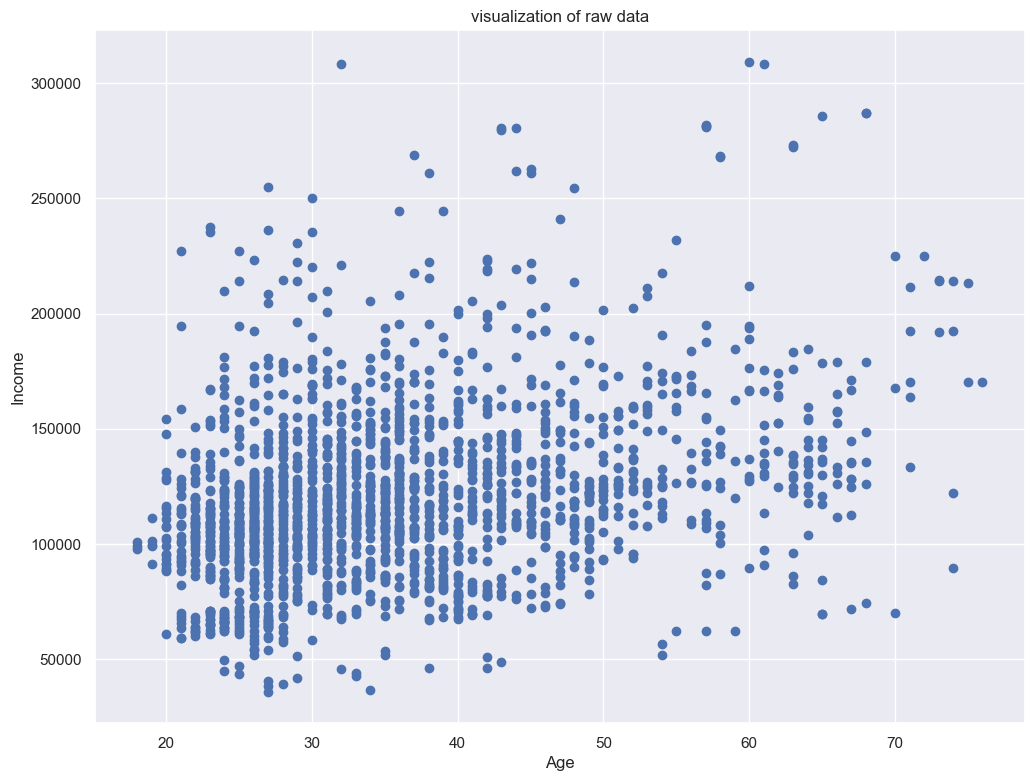

In [5]:
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,3],df.iloc[:,5])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('visualization of raw data')

In [6]:
df=df.drop('ID',axis=1)

### OBJECTIVE: 
Applying different clustering algorithms and data rduction techniques for customers segmetation

## DATA PREPROCESSING

In [7]:
scaler=StandardScaler()
df_std=scaler.fit_transform(df)
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

We want to decide how many features we'll keep with pca using cumulative variance plot

In [8]:
pca = PCA()
pca.fit(df_std)

PCA()

In [9]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0.5, 1.0, 'Explained variance by component')

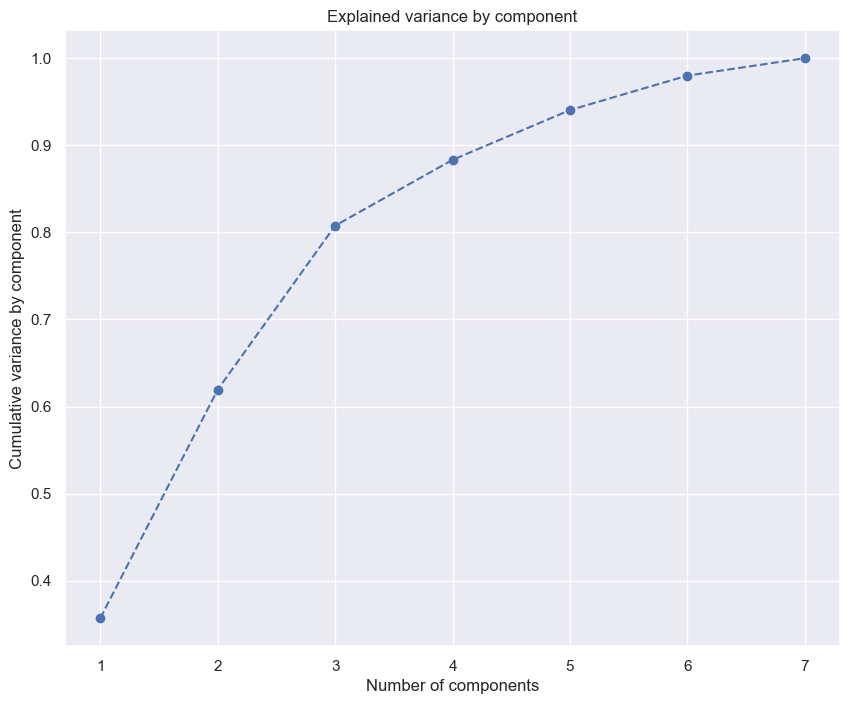

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance by component')
plt.title('Explained variance by component')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [11]:
pca = PCA(n_components=3)
pca.fit(df_std)

PCA(n_components=3)

In [12]:
scores_pca=pca.transform(df_std)

### k means clustering with pca
We start by testing 20 clusters

In [13]:
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

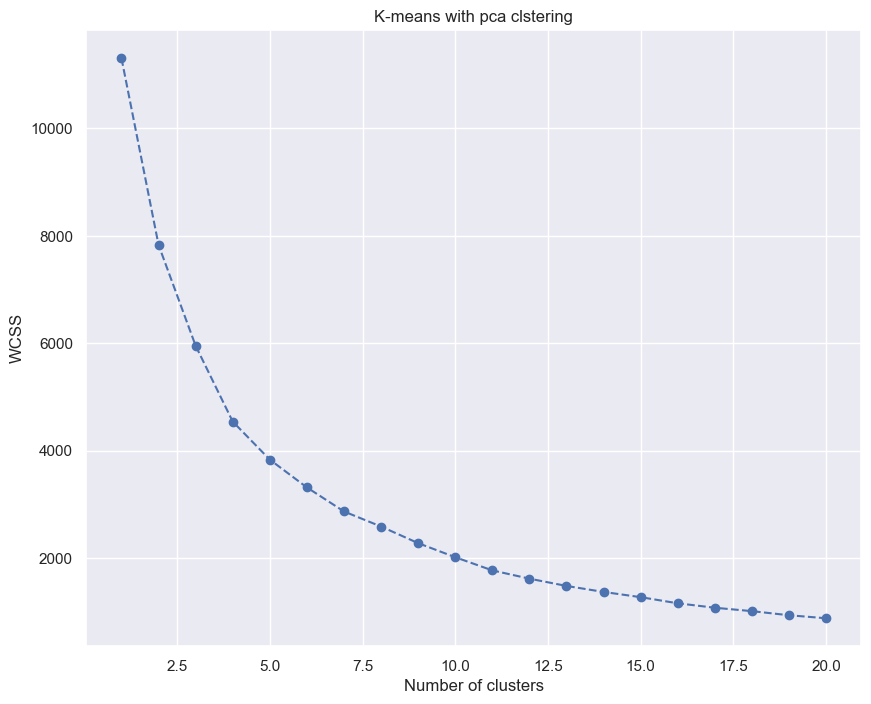

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with pca clstering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 4 clusters mark. So, we’ll be keeping a four-cluster solution. We must now implement it

In [15]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### Analysing results

In [16]:
# creating ne dataframe with original and pca scores and assigned clusters
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component1','Component2','Component3']
df_segm_pca_kmeans['Segment k-means pca']=kmeans_pca.labels_

In [17]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,Segment k-means pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [18]:
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment k-means pca'].map({0:'first',
                                                                            1:'second',
                                                                            2:'third',
                                                                            3:'fourth'})

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


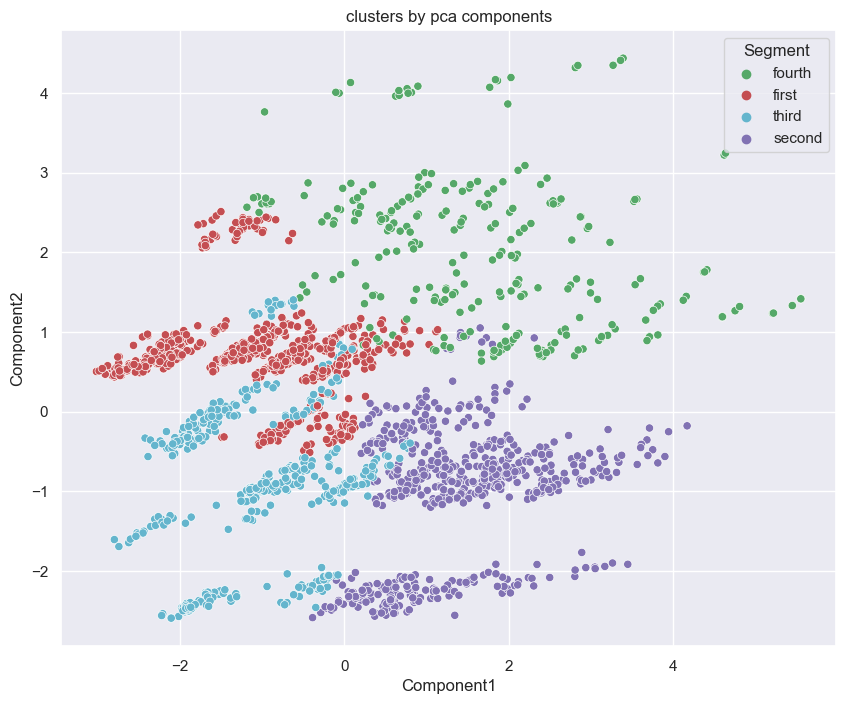

In [19]:
#plotting pca components
x_axis=df_segm_pca_kmeans['Component1']
y_axis=df_segm_pca_kmeans['Component2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Segment'],palette=['g','r','c','m'])
plt.title('clusters by pca components')
plt.show()

## Meanshift

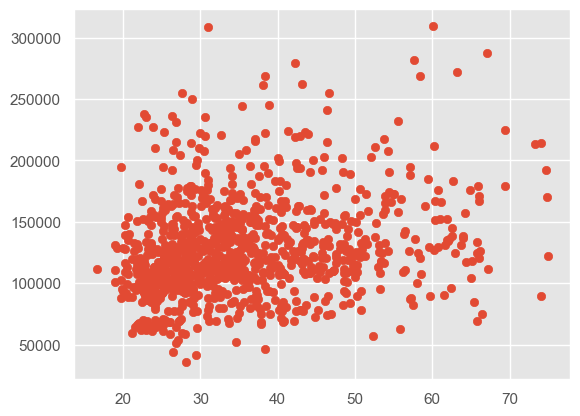

In [20]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs
position = df.to_numpy()
X,_=make_blobs(n_samples=1000,centers=position,cluster_std=0.80)
plt.scatter(X[:,2],X[:,4])
plt.show()

[[3.46058840e-01 4.12894045e-01 3.43748481e+01 8.90758213e-01
  1.15746983e+05 8.41744232e-01 9.11283275e-01]]
Estimated clusters: 1


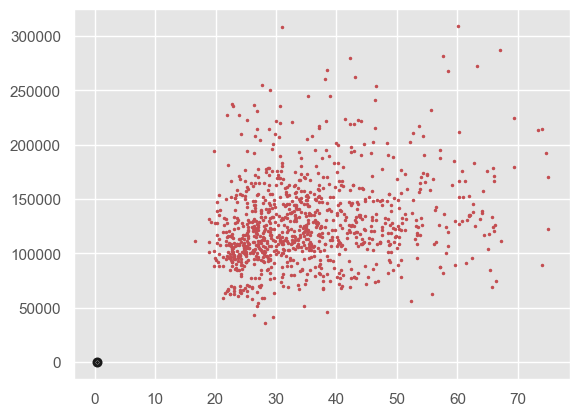

In [21]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][2], X[i][4], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

## Guassian Mixture Model

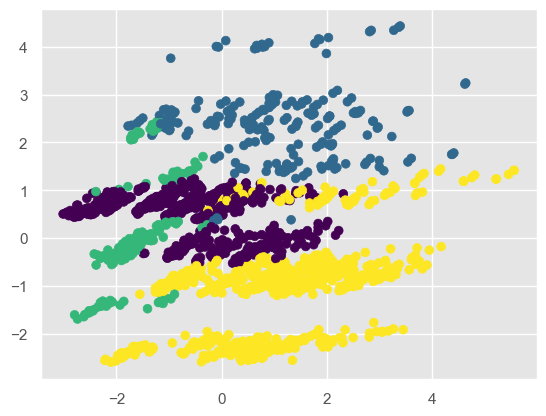

In [25]:
from sklearn import mixture 
X=scores_pca
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments

In [27]:
probs = gmm.predict_proba(X)
print(probs[:4].round(3))

[[0.    0.    0.    1.   ]
 [0.999 0.001 0.    0.   ]
 [0.    0.    0.003 0.997]
 [0.    0.    0.    1.   ]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

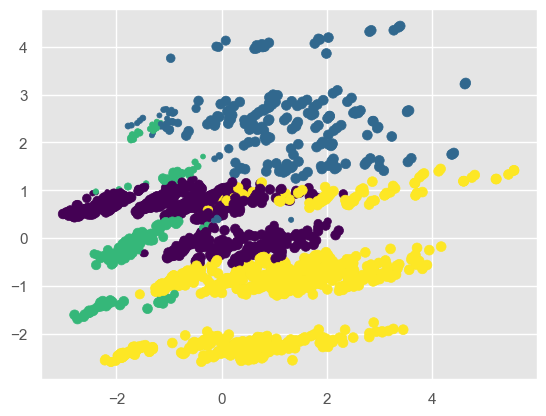

In [28]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

trying to find the best number of components,The optimal number of components is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

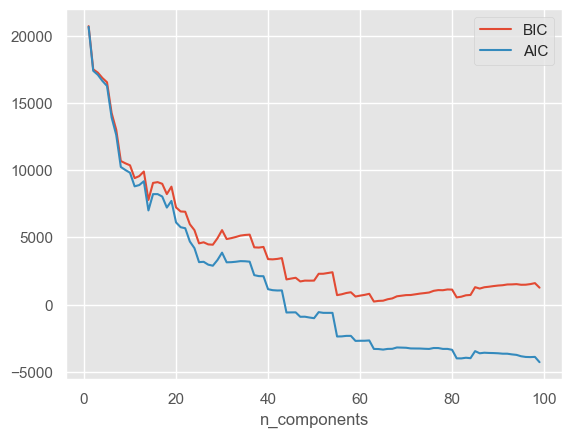

In [34]:
n_components = np.arange(1, 100)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Conclusion:
**The best algorithm** in this use case was K-means, we were able to find the number of clusters using the elbow method and it gave us cleare results.
with GMM we first tried using the same number of clusters, and we found smilare results to kmeans. Then we tried to find the best number of components and the curve that we found was verry confusing.
For mean shift, he algorithm only found one cluster, and i think this part of the notebbok should be revisited.